In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

### references
https://github.com/JackFongNew/Singapore-HDB-Resale-Price-Prediction

https://github.com/threnjen/king_county_housing?tab=readme-ov-file

https://chatgpt.com/c/681ab061-91ec-800a-9f55-38e64fbf241f

https://github.com/jerrychens/king_county_house_price/blob/master/Final_Jerry.ipynb

https://github.com/nadinezab/kc-house-prices-prediction/blob/master/kc-house-prices.ipynb

https://github.com/aidanandrucyk/KingCountyHouseSalePriceMLAnalysis/blob/master/ML_King_County_Housing_Price_Predictor.ipynb

https://chatgpt.com/c/681af363-3f5c-800a-b621-fa7714205316

In [19]:
df = pd.read_csv(r'C:\Users\Admin\Desktopworkfolder\term 2\Machine learning\CA1\factory_data.csv')

In [21]:
df

,Unique ID,Product ID,Quality,Ambient T (C),Process T (C),Rotation Speed (rpm),Torque (Nm),Tool Wear (min),Machine Status
0,1,K12965,M,24.95,35.45,1551.0,42.8,0,0
1,2,Z62710,L,25.05,35.55,1408.0,46.3,3,0
2,3,T20224,L,24.95,35.35,1498.0,49.4,5,0
3,4,Z33024,L,25.05,35.45,1433.0,39.5,7,0
4,5,Z52839,L,25.05,35.55,1408.0,40.0,9,0
...,...,...,...,...,...,...,...,...,...
19995,19996,T87335,M,25.75,35.35,NaN,29.5,14,0
19996,19997,Z59525,H,25.85,35.35,1632.0,31.8,17,0
19997,19998,T83921,M,25.95,NaN,NaN,33.4,22,0
19998,19999,K42424,H,25.95,35.65,1408.0,48.5,25,0


In [23]:
df.describe

<bound method NDFrame.describe of        Unique ID Product ID Quality  Ambient T (C)  Process T (C)  \
0              1     K12965       M          24.95          35.45   
1              2     Z62710       L          25.05          35.55   
2              3     T20224       L          24.95          35.35   
3              4     Z33024       L          25.05          35.45   
4              5     Z52839       L          25.05          35.55   
...          ...        ...     ...            ...            ...   
19995      19996     T87335       M          25.75          35.35   
19996      19997     Z59525       H          25.85          35.35   
19997      19998     T83921       M          25.95            NaN   
19998      19999     K42424       H          25.95          35.65   
19999      20000     Z10048       M          25.95          35.65   

       Rotation Speed (rpm)  Torque (Nm)  Tool Wear (min)  Machine Status  
0                    1551.0         42.8                0    

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unique ID             20000 non-null  int64  
 1   Product ID            20000 non-null  object 
 2   Quality               19009 non-null  object 
 3   Ambient T (C)         20000 non-null  float64
 4   Process T (C)         19600 non-null  float64
 5   Rotation Speed (rpm)  18812 non-null  float64
 6   Torque (Nm)           20000 non-null  float64
 7   Tool Wear (min)       20000 non-null  int64  
 8   Machine Status        20000 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 1.4+ MB


In [27]:
df.head()

,Unique ID,Product ID,Quality,Ambient T (C),Process T (C),Rotation Speed (rpm),Torque (Nm),Tool Wear (min),Machine Status
0,1,K12965,M,24.95,35.45,1551.0,42.8,0,0
1,2,Z62710,L,25.05,35.55,1408.0,46.3,3,0
2,3,T20224,L,24.95,35.35,1498.0,49.4,5,0
3,4,Z33024,L,25.05,35.45,1433.0,39.5,7,0
4,5,Z52839,L,25.05,35.55,1408.0,40.0,9,0


In [29]:
# Quality, Process T (C), Rotation Speed (rpm) - missing values
df.isnull().sum()

Unique ID                  0
Product ID                 0
Quality                  991
Ambient T (C)              0
Process T (C)            400
Rotation Speed (rpm)    1188
Torque (Nm)                0
Tool Wear (min)            0
Machine Status             0
dtype: int64

## Dict

Unique ID: the unique identifier

Product ID: the product ID

Quality: the machine quality, L=Low, M=Medium, H=High

Ambient T: the ambient temperature

Process T: the process temperature

Rotation Speed: the machine rotation speed measured in rpm (rounds per minute)

Torque: the torque of the machine

Tool Wear: the time of tool wear

Machine Status: 0 means normal, 1 means abnormal

In [32]:
# Preprocessing data - part 1 - impute 'Rotation Speed (rpm)', 'Process T (C)'

In [34]:
from sklearn.impute import KNNImputer

df_trans = df.copy(deep=True)
impute_cols = ['Rotation Speed (rpm)', 'Process T (C)']

knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
df_trans[impute_cols] = knn_imputer.fit_transform(df_trans[impute_cols])

In [35]:
df_trans.isnull().sum()

Unique ID                 0
Product ID                0
Quality                 991
Ambient T (C)             0
Process T (C)             0
Rotation Speed (rpm)      0
Torque (Nm)               0
Tool Wear (min)           0
Machine Status            0
dtype: int64

In [36]:
# Preprocessing data - part 2 - impute 'Quality'

In [37]:
df_trans['Quality'].value_counts(dropna = False)


Quality
L      11390
M       5696
H       1923
NaN      991
Name: count, dtype: int64

In [42]:
from sklearn.impute import SimpleImputer

Quality_imputer = SimpleImputer(strategy='most_frequent')

# Example: impute 'Size' column with values like 'small', 'medium', 'large'
df_trans['Quality'] = Quality_imputer.fit_transform(df_trans[['Quality']])[:, 0]

In [44]:
df_trans.isnull().sum()

Unique ID               0
Product ID              0
Quality                 0
Ambient T (C)           0
Process T (C)           0
Rotation Speed (rpm)    0
Torque (Nm)             0
Tool Wear (min)         0
Machine Status          0
dtype: int64

In [46]:
df_trans['Quality'].value_counts(dropna = False)

Quality
L    12381
M     5696
H     1923
Name: count, dtype: int64

In [48]:
# Preprocessing data - part 3 - encode

In [50]:
from sklearn.preprocessing import OrdinalEncoder

In [52]:
encoder = OrdinalEncoder(categories=[['L', 'M', 'H']])
df_trans['Quality'] = encoder.fit_transform(df_trans[['Quality']])

In [54]:
df_trans

,Unique ID,Product ID,Quality,Ambient T (C),Process T (C),Rotation Speed (rpm),Torque (Nm),Tool Wear (min),Machine Status
0,1,K12965,1.0,24.95,35.450000,1551.000000,42.8,0,0
1,2,Z62710,0.0,25.05,35.550000,1408.000000,46.3,3,0
2,3,T20224,0.0,24.95,35.350000,1498.000000,49.4,5,0
3,4,Z33024,0.0,25.05,35.450000,1433.000000,39.5,7,0
4,5,Z52839,0.0,25.05,35.550000,1408.000000,40.0,9,0
...,...,...,...,...,...,...,...,...,...
19995,19996,T87335,1.0,25.75,35.350000,1482.500000,29.5,14,0
19996,19997,Z59525,2.0,25.85,35.350000,1632.000000,31.8,17,0
19997,19998,T83921,1.0,25.95,36.904291,1538.795397,33.4,22,0
19998,19999,K42424,2.0,25.95,35.650000,1408.000000,48.5,25,0


In [56]:
df_encoded_drop = df_trans.drop(['Product ID','Unique ID'], axis = 1)

array([[<Axes: title={'center': 'Quality'}>,
        <Axes: title={'center': 'Ambient T (C)'}>,
        <Axes: title={'center': 'Process T (C)'}>],
       [<Axes: title={'center': 'Rotation Speed (rpm)'}>,
        <Axes: title={'center': 'Torque (Nm)'}>,
        <Axes: title={'center': 'Tool Wear (min)'}>],
       [<Axes: title={'center': 'Machine Status'}>, <Axes: >, <Axes: >]],
      dtype=object)

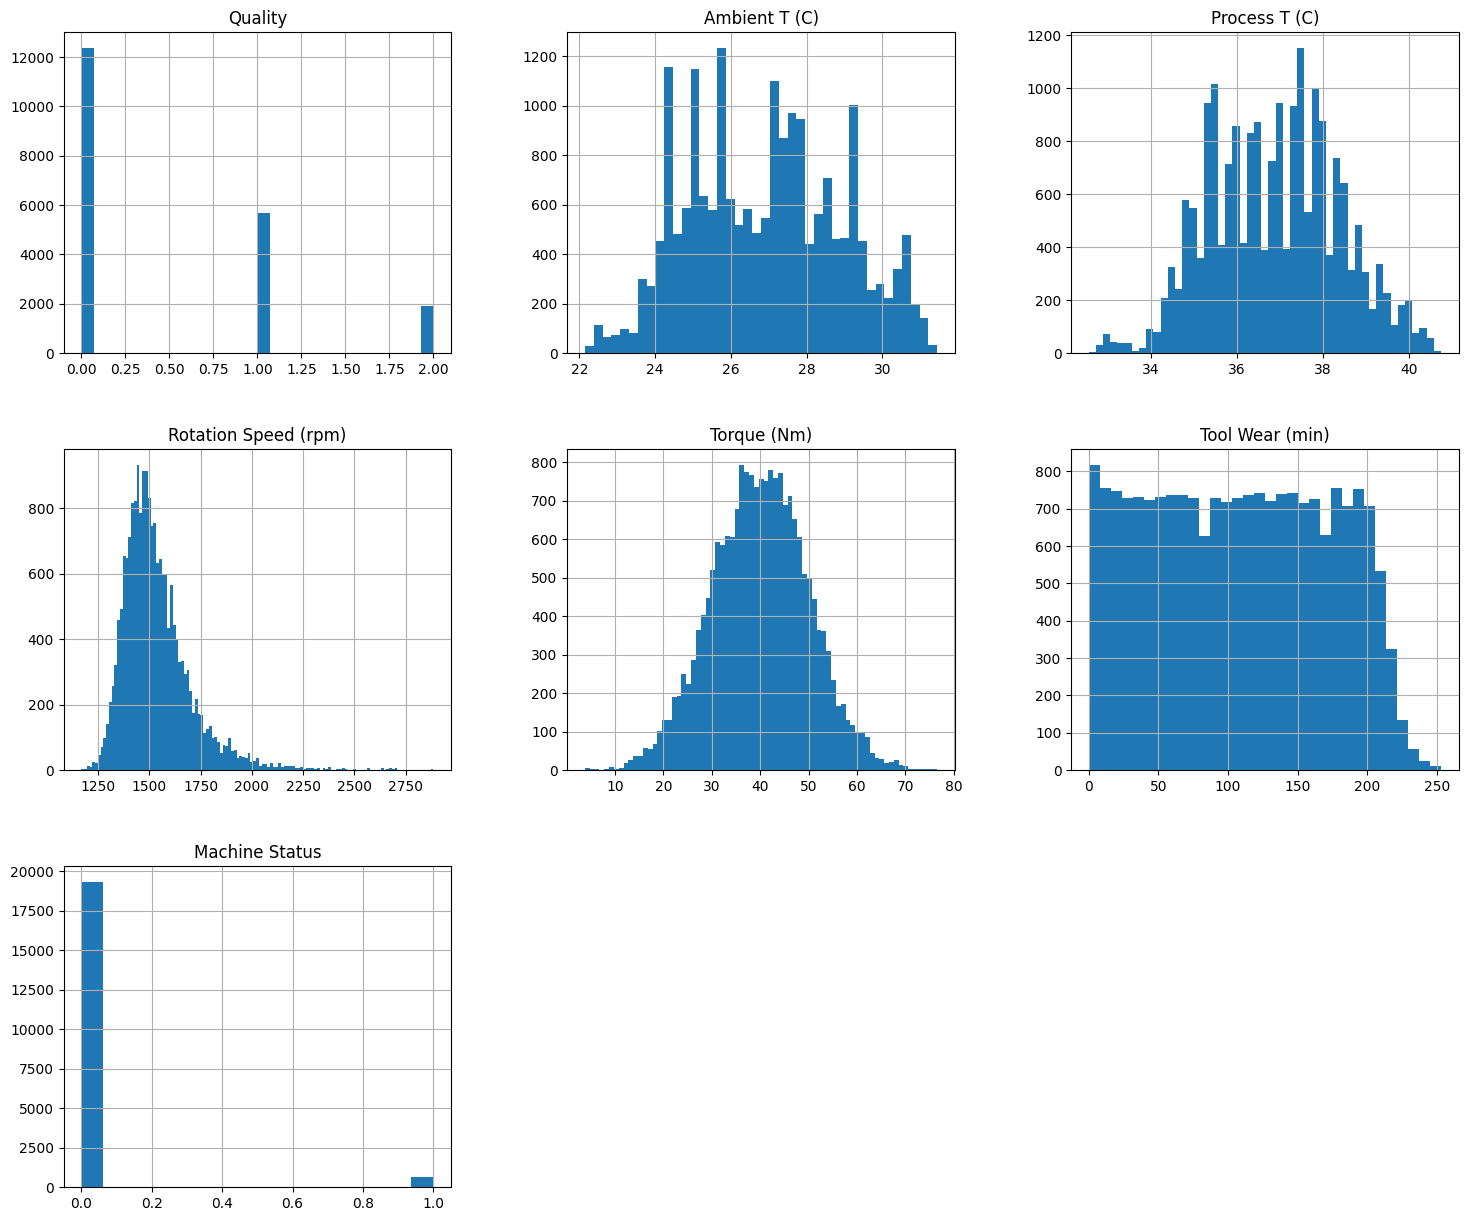

In [58]:
df_encoded_drop.hist(figsize=(18,15), bins='auto')

<Axes: xlabel='Machine Status', ylabel='count'>

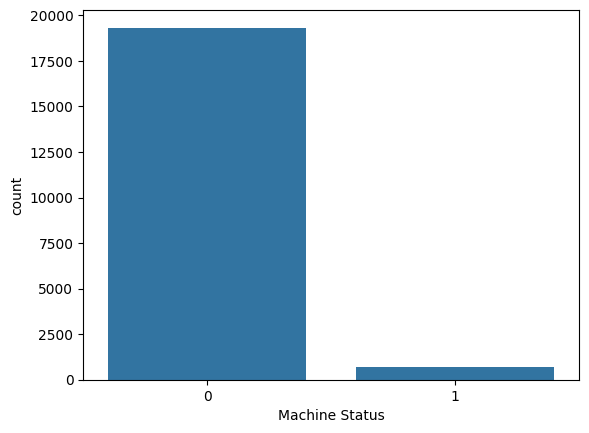

In [86]:
sns.countplot(data=df_encoded_drop, x = "Machine Status")
# Given that there is uneven sample size - XGboost will be used

<Axes: >

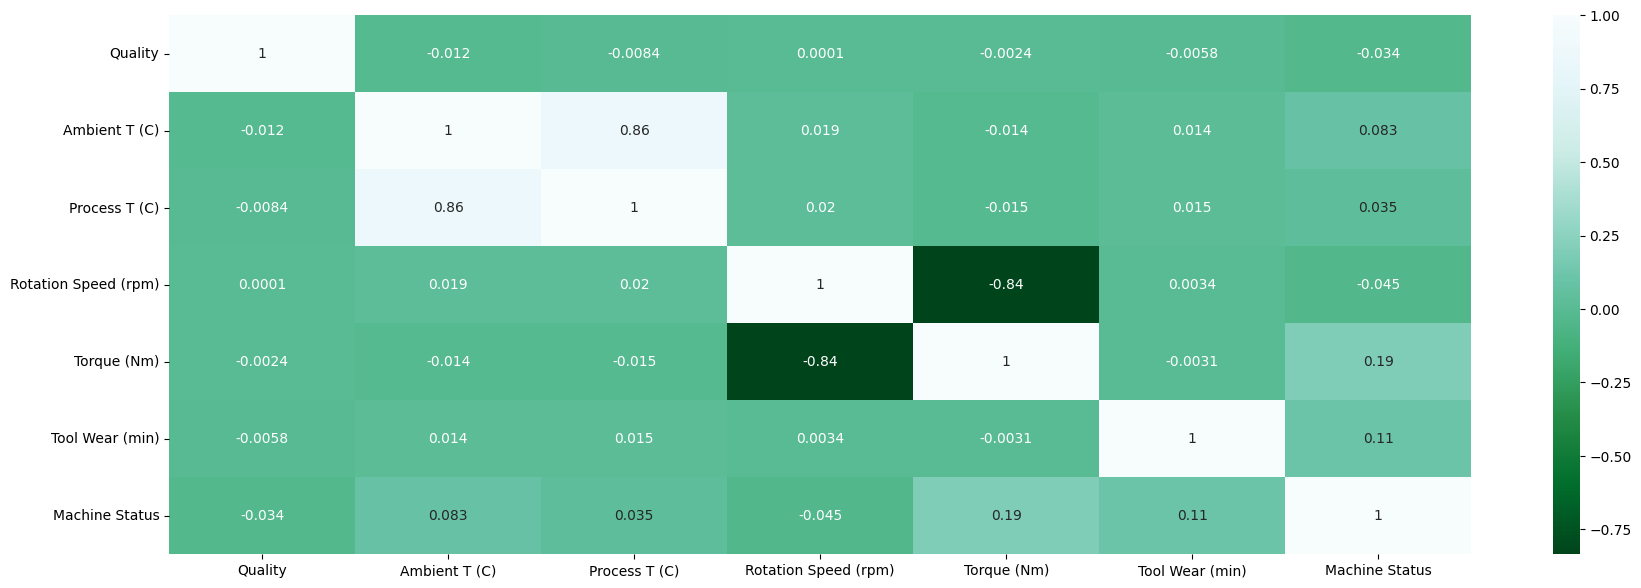

In [54]:
plt.figure(figsize=(21,7))
sns.heatmap(df_encoded_drop.corr(), annot=True, cmap='BuGn_r')

In [62]:
print(f"The pearson correlation suggests that the following have a positive correlation Process T (C): Ambient T(C) - 0.86")
print(f"The pearson correlation suggests that the following have a negative correlation Torque (Nm): Rotation Speed (RPM) - -0.84")

The pearson correlation suggests that the following have a positive correlation Process T (C): Ambient T(C) - 0.86
The pearson correlation suggests that the following have a negative correlation Torque (Nm): Rotation Speed (RPM) - -0.84


## Data test split - Model fitting (Linear regression)

In [190]:
from sklearn.model_selection import train_test_split
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.linear_model import Ridge
import statsmodels.api as sm 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [192]:
# Separate features (X) and target variable (y)
X = df_encoded_drop.drop('Machine Status', axis=1) # Features
y = df_encoded_drop['Machine Status'] #Target

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [196]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (16000, 6)
X_test shape: (4000, 6)
y_train shape: (16000,)
y_test shape: (4000,)


In [198]:
# Define hyperparameter distributions
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)


pipeline = Pipeline([
    ('scaler', StandardScaler()),       # Step 1: scale the data
    ('ridge', Ridge())                  # Step 2: apply Ridge
])

param_grid = {
    'alpha': np.logspace(0.0001, 1, 100),  # Try small to large alphas
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag']
}

# Create a random forest classifier
ridge = Ridge()

# Randomized search
ridge_cv = RandomizedSearchCV(
    ridge, 
    param_distributions=param_grid, 
    n_iter=5, 
    cv=kf,        # Use your predefined CV splitter
    scoring='r2', # Make sure you're evaluating with R²
    random_state=42
)

ridge.fit(X_train, y_train)

Ridge()

In [200]:
# Results
print("Best alpha:", ridge_cv.best_params_['alpha'])
print("Best solver:", ridge_cv.best_params_['solver'])
print("Best CV R² score:", ridge_cv.best_score_)

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

In [202]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred = ridge_cv.predict(X_test)
print("Test R²:", r2_score(y_test, y_pred))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


NotFittedError: This RandomizedSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.